<a href="https://colab.research.google.com/github/Maropro3/GraphAnalysisPracticalWork/blob/main/GraphRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.feature_selection import SelectKBest

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Maropro3/GraphAnalysisPracticalWork/main/Movies.csv")
df.head().T

,0,1,2,3,4
GexfID,1,2,5,6,7
Title,10 Things I Hate About You,12,127 Hours,1492: Conquest of Paradise,15 Minutes
IMDB_id,tt0147800,tt0488478,tt1542344,tt0103594,tt0179626
ReleaseDate,1999,2007,2010,1992,2001
Slug,10-Things-I-Hate-About-You,12,127-Hours,1492:-Conquest-of-Paradise,15-Minutes
WeightedDegree,13.04,4.227,3.833,7.941,8.784
Modularity,0.194,0.517,0.16,0.35,0.344
PathLength,1.779,2.17,1.722,2.043,2.114
Diameter,3,3,2,4,4
ClusteringCoefficient,0.567,0.61,0.339,0.705,0.713


In [3]:
df = df.drop(['GexfID', 'Title', 'IMDB_id', 'ReleaseDate', 'Slug'], axis=1)

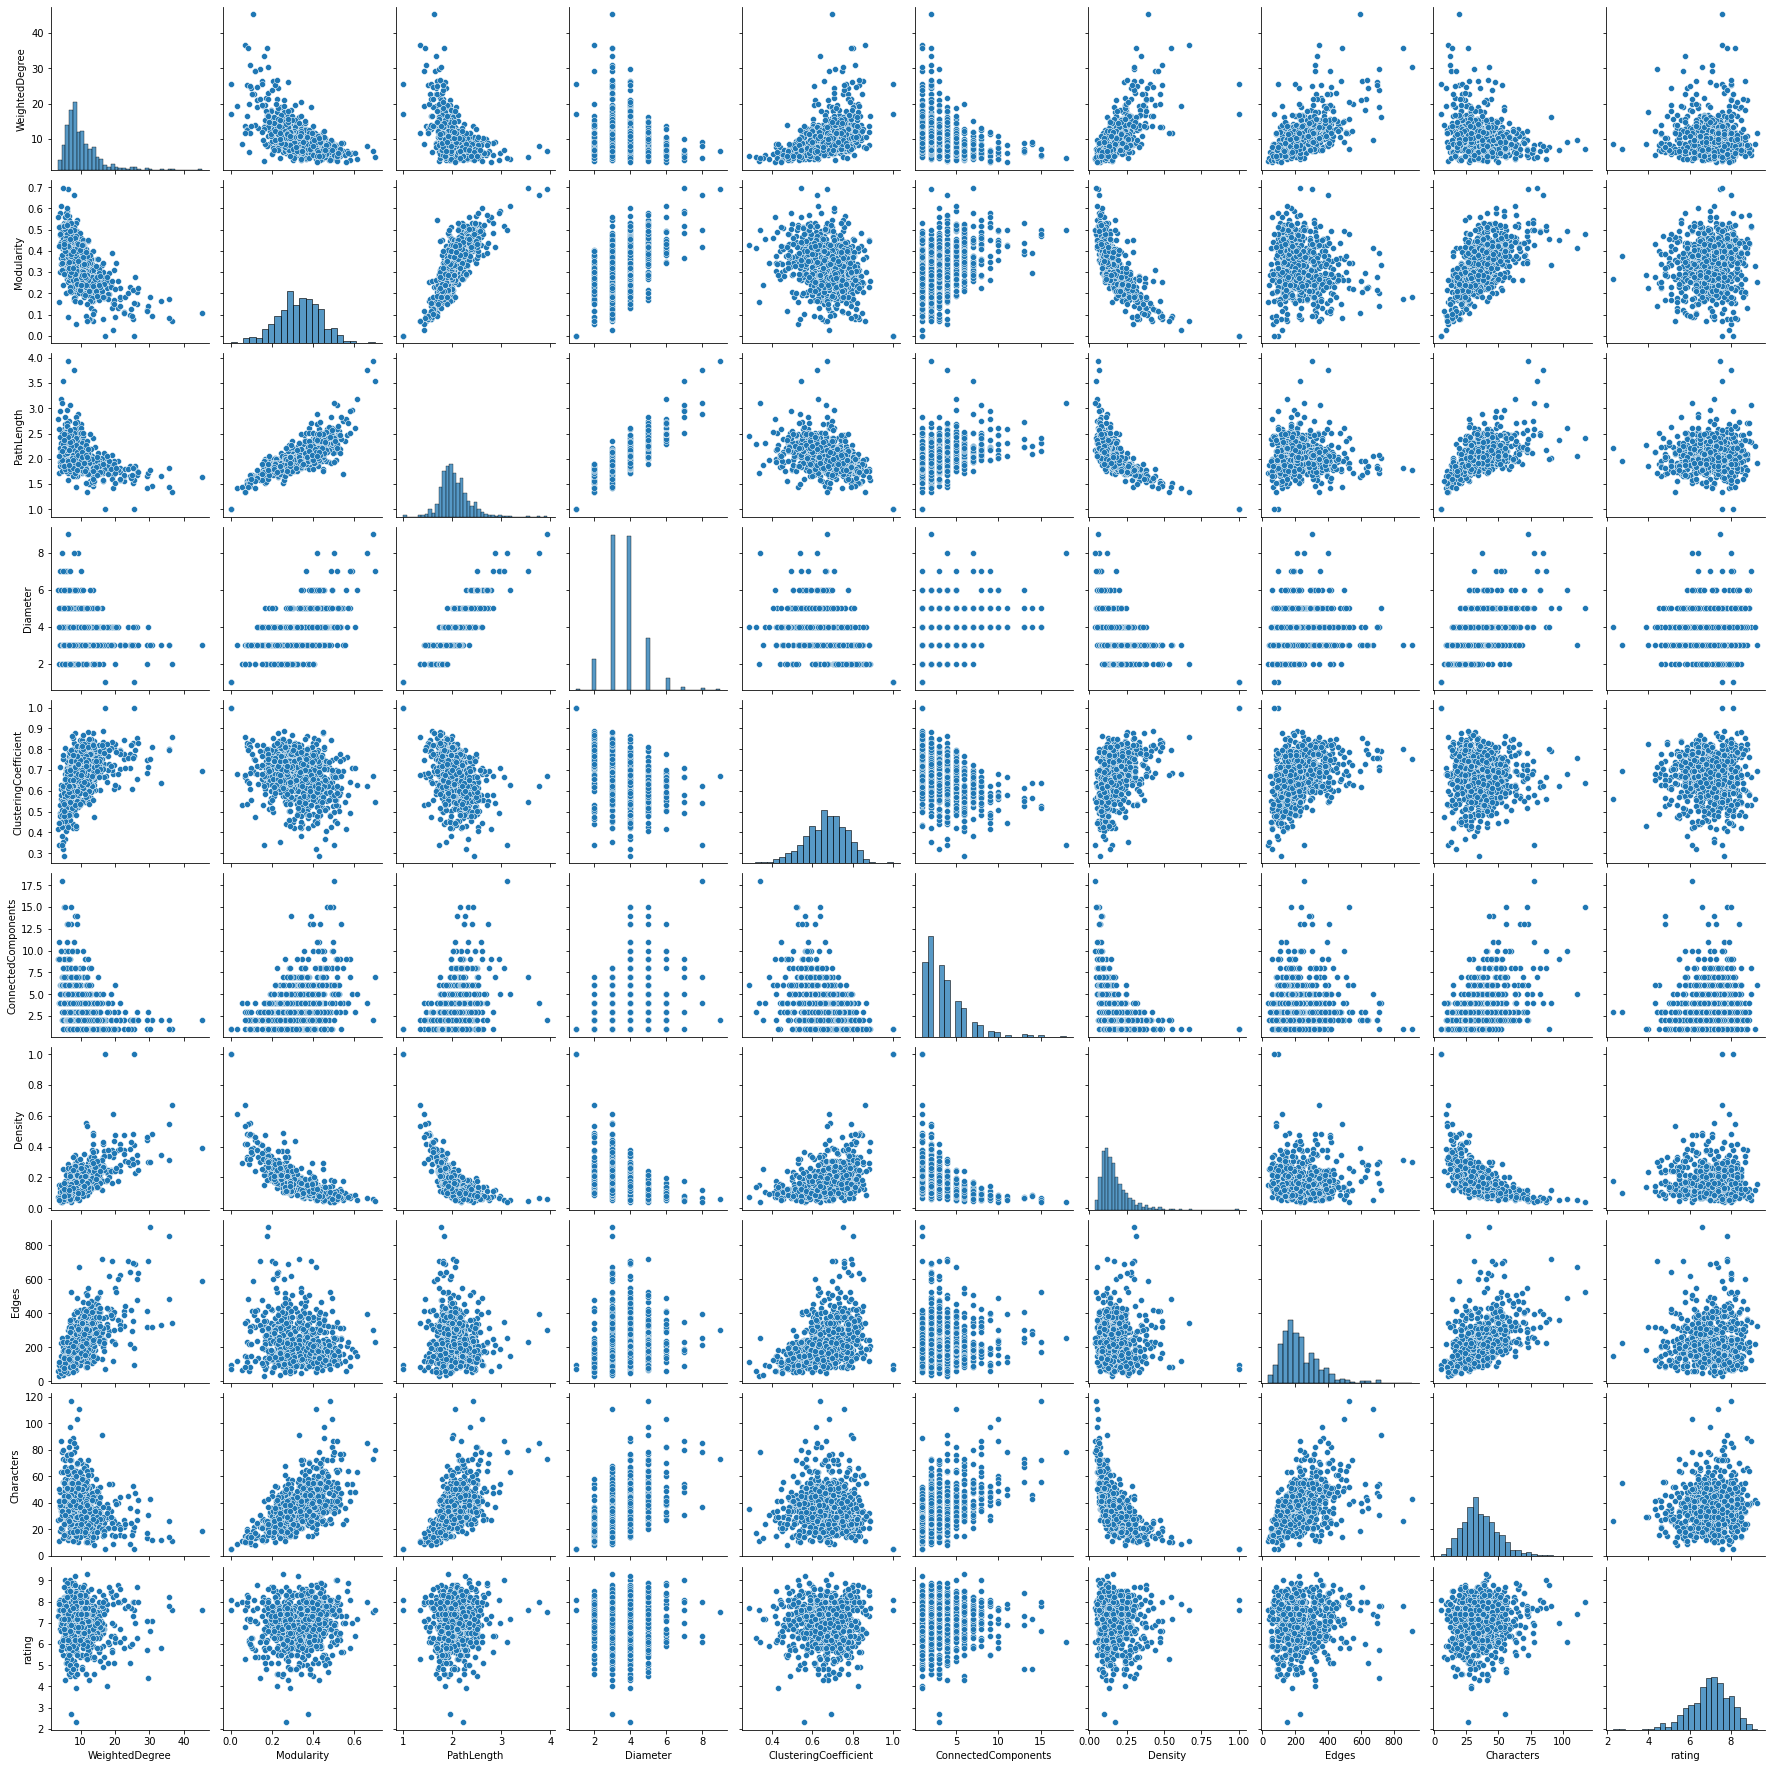

In [4]:
sns.pairplot(df)

In [5]:
plt.rcParams["figure.figsize"] = (20,18)
plt.rcParams.update({'font.size': 20})

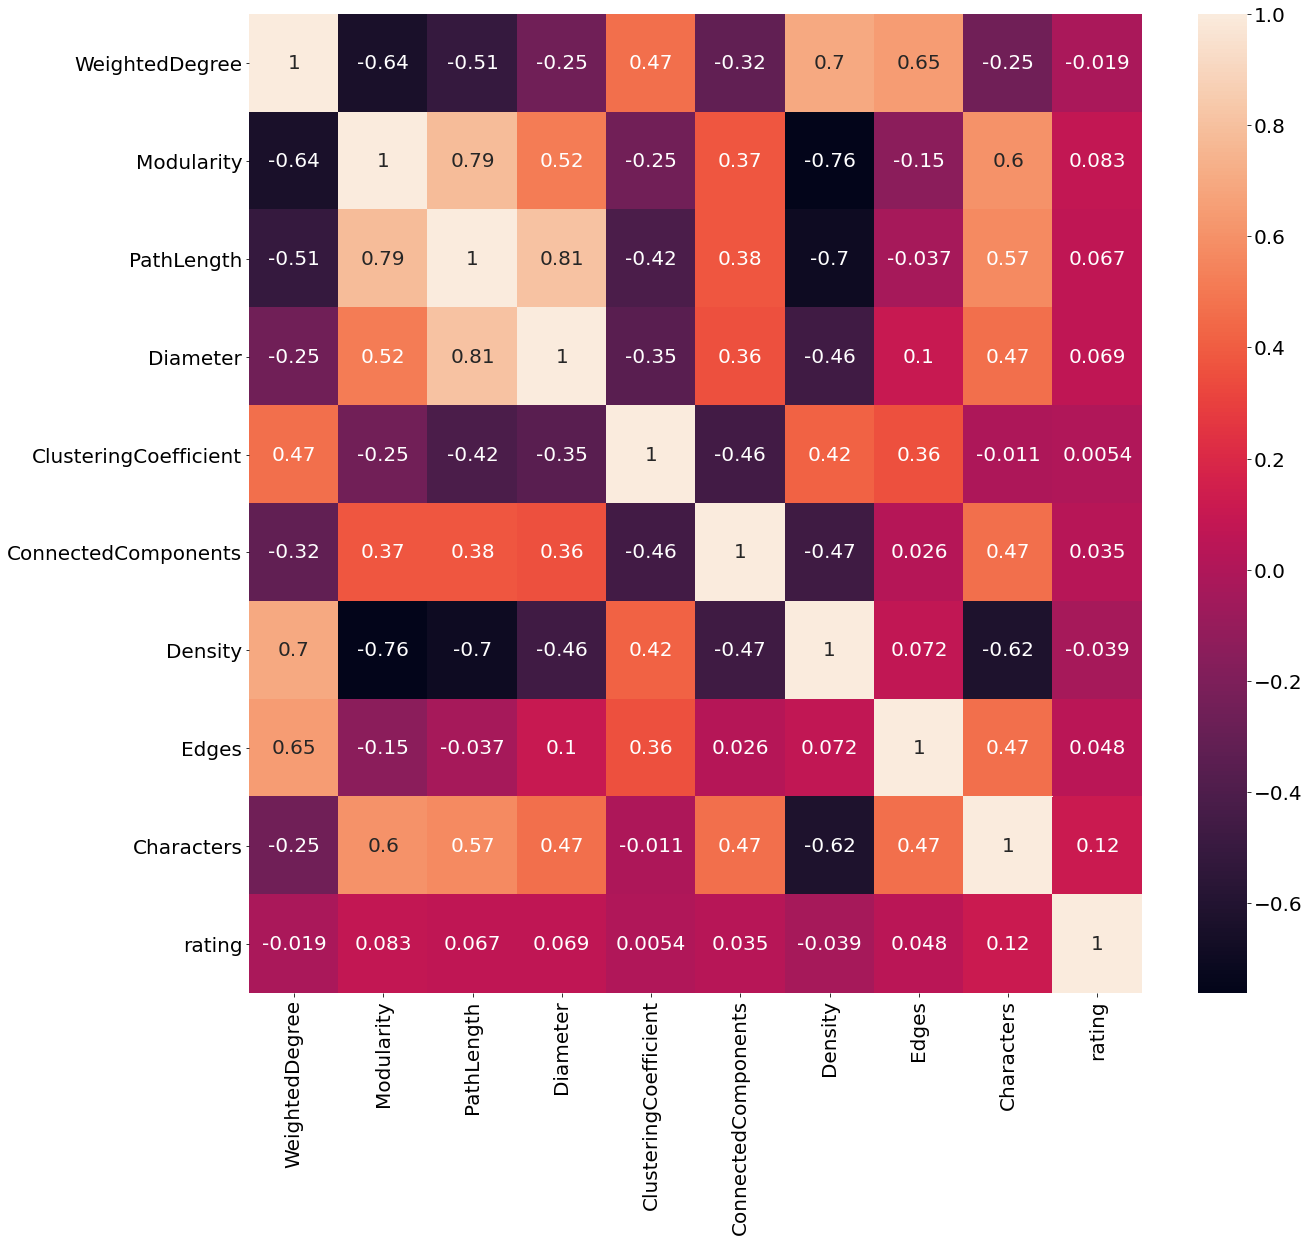

In [6]:
corrM = df.corr()
sns.heatmap(corrM, annot=True)

plt.show()

In [7]:
data = df.drop(columns=['rating'])
target = df['rating']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1) 

In [9]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [10]:
L = []

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    L.append(fs.scores_[i])

In [11]:
d = {'attribute': data.columns, 'score': L}
d = pd.DataFrame(data=d)

Text(0.5, 1.0, 'Mutual information Regression')

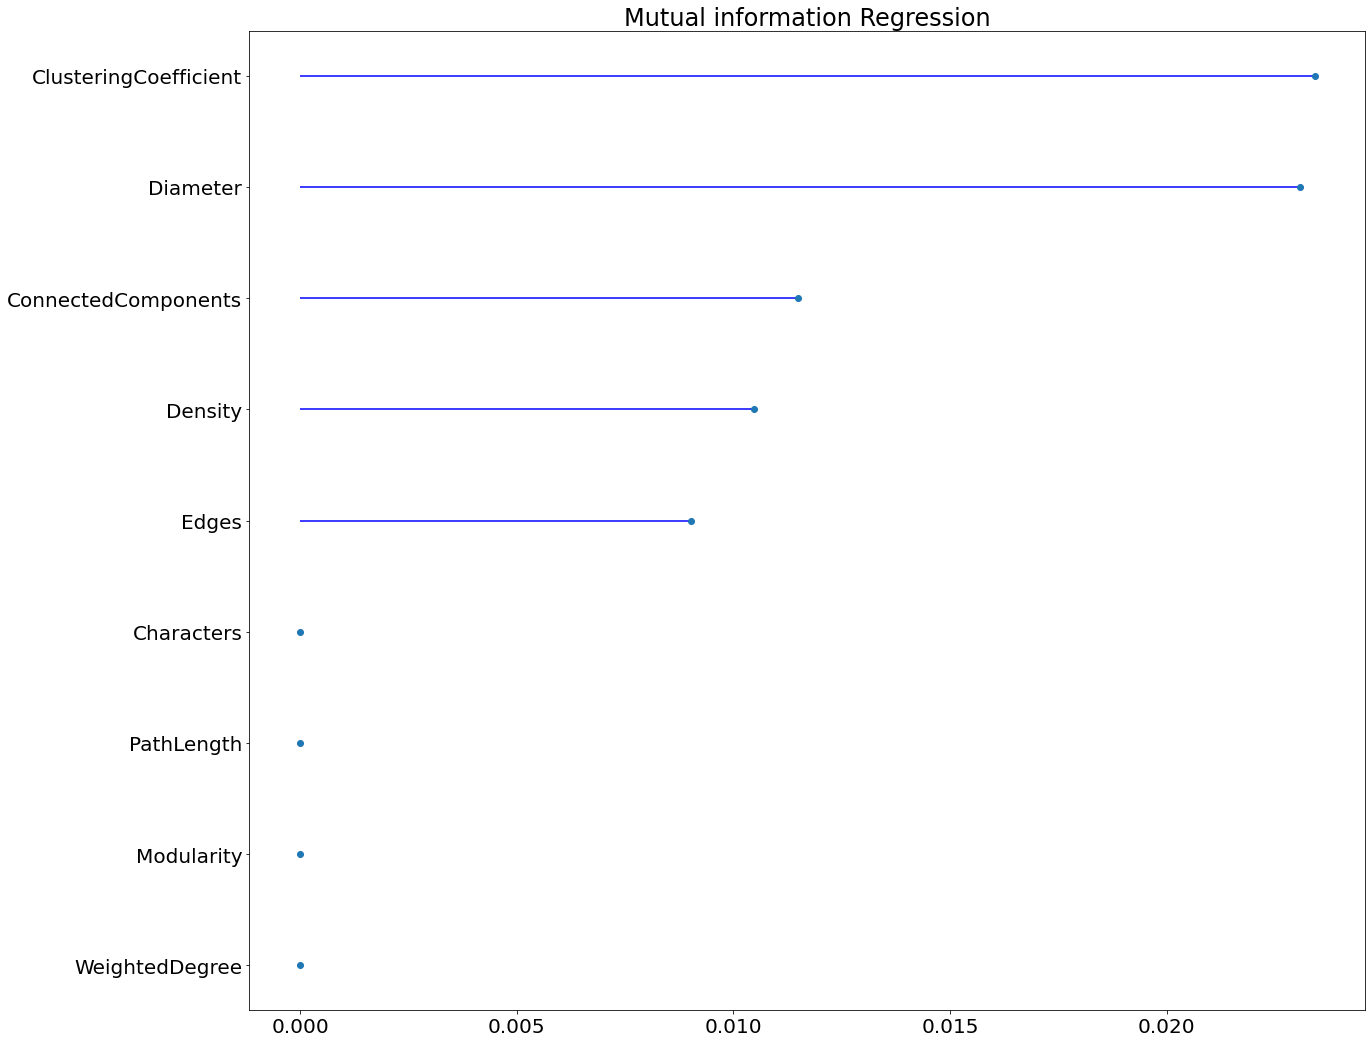

In [12]:
ordered_X = d.sort_values(by='score')
my_range=range(1,len(d.index)+1)
 
plt.hlines(y=my_range, xmin=0, xmax=ordered_X['score'], color='b')
plt.plot(ordered_X['score'], my_range, "o")
 
plt.yticks(my_range,ordered_X['attribute'])
plt.title("Mutual information Regression")

In [13]:
data = df.drop(columns=[ 'rating'])
target = df['rating']
dataTrain, dataTest, targetTrain, targetTest = train_test_split(data, target, test_size=0.3, random_state=1)

In [14]:
lr = LinearRegression().fit(dataTrain, targetTrain)
lr_pred = lr.predict(dataTest)

In [15]:
print('Coefficients: \n', lr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(targetTest, lr_pred))
print('r2: %.2f'
      % r2_score(targetTest, lr_pred))

Coefficients: 
 [-7.31736766e-03  1.18836629e+00 -7.53034823e-02  2.19550263e-02
 -1.18291450e+00 -3.64857581e-02  2.08599889e+00  8.54350254e-04
  1.01654305e-02]
Mean squared error: 0.98
r2: -0.05


In [16]:
kn = KNeighborsRegressor().fit(dataTrain, targetTrain)
kn_pred = kn.predict(dataTest)

In [17]:
print('Coefficients: \n', lr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(targetTest, kn_pred))
print('r2: %.2f'
      % r2_score(targetTest, kn_pred))


Coefficients: 
 [-7.31736766e-03  1.18836629e+00 -7.53034823e-02  2.19550263e-02
 -1.18291450e+00 -3.64857581e-02  2.08599889e+00  8.54350254e-04
  1.01654305e-02]
Mean squared error: 1.12
r2: -0.20
